<a href="https://colab.research.google.com/github/kirmanioussema12/Deep-Learning/blob/main/network_earlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop
from keras import  backend as K

In [ ]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

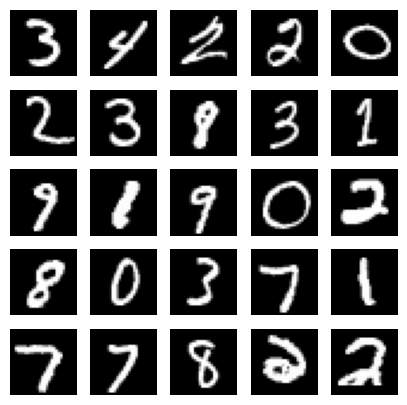

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
image_size=28
input_size = image_size * image_size
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers

In [ ]:
num_labels=10
model = Sequential()
#model.add(Dense(784, input_dim=input_size, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(784, input_dim=input_size, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(dropout))
model.add(Dense(784, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(784, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(500, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(500, activation='relu'))
#model.add(Dropout(dropout))
#model.add(Dropout(dropout))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(100, activation='relu'))
model.add(Dropout(dropout))
#model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_train=np.reshape(y_train,(-1,1))
print(y_train.shape)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
#.toarray()
enc_df = enc.fit_transform(y_train).toarray()
print(enc_df.shape)

(60000, 1)
(60000, 10)


In [ ]:
y_test=np.reshape(y_test,(-1,1))
enc_df2 = enc.fit_transform(y_test).toarray()
print(enc_df2.shape)

(10000, 10)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#save_best_only=True
model.fit(x_train, enc_df, epochs=22, batch_size=batch_size, validation_data=(x_test,enc_df2))

Epoch 1/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.8186 - loss: 0.9334 - val_accuracy: 0.9636 - val_loss: 0.3056
Epoch 2/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9583 - loss: 0.3180 - val_accuracy: 0.9702 - val_loss: 0.2442
Epoch 3/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9662 - loss: 0.2569 - val_accuracy: 0.9650 - val_loss: 0.2382
Epoch 4/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9729 - loss: 0.2137 - val_accuracy: 0.9753 - val_loss: 0.1988
Epoch 5/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9734 - loss: 0.2037 - val_accuracy: 0.9730 - val_loss: 0.2001
Epoch 6/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.9779 - loss: 0.1779 - val_accuracy: 0.9745 - val_loss: 0.1821
Epoch 7/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.9800 - loss: 0.1572 - val_accuracy: 0.9764 - val_loss: 0.1733
Epoch 8/22
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9799 - loss: 0.1575 - 

In [ ]:
#Remarques
# c'est ainsi qu'on peux ajouter le regulizer
from tensorflow.keras import layers
from tensorflow.keras import regularizers

layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,932,860 (30.26 MB)

 Trainable params: 2,644,286 (10.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,288,574 (20.17 MB)

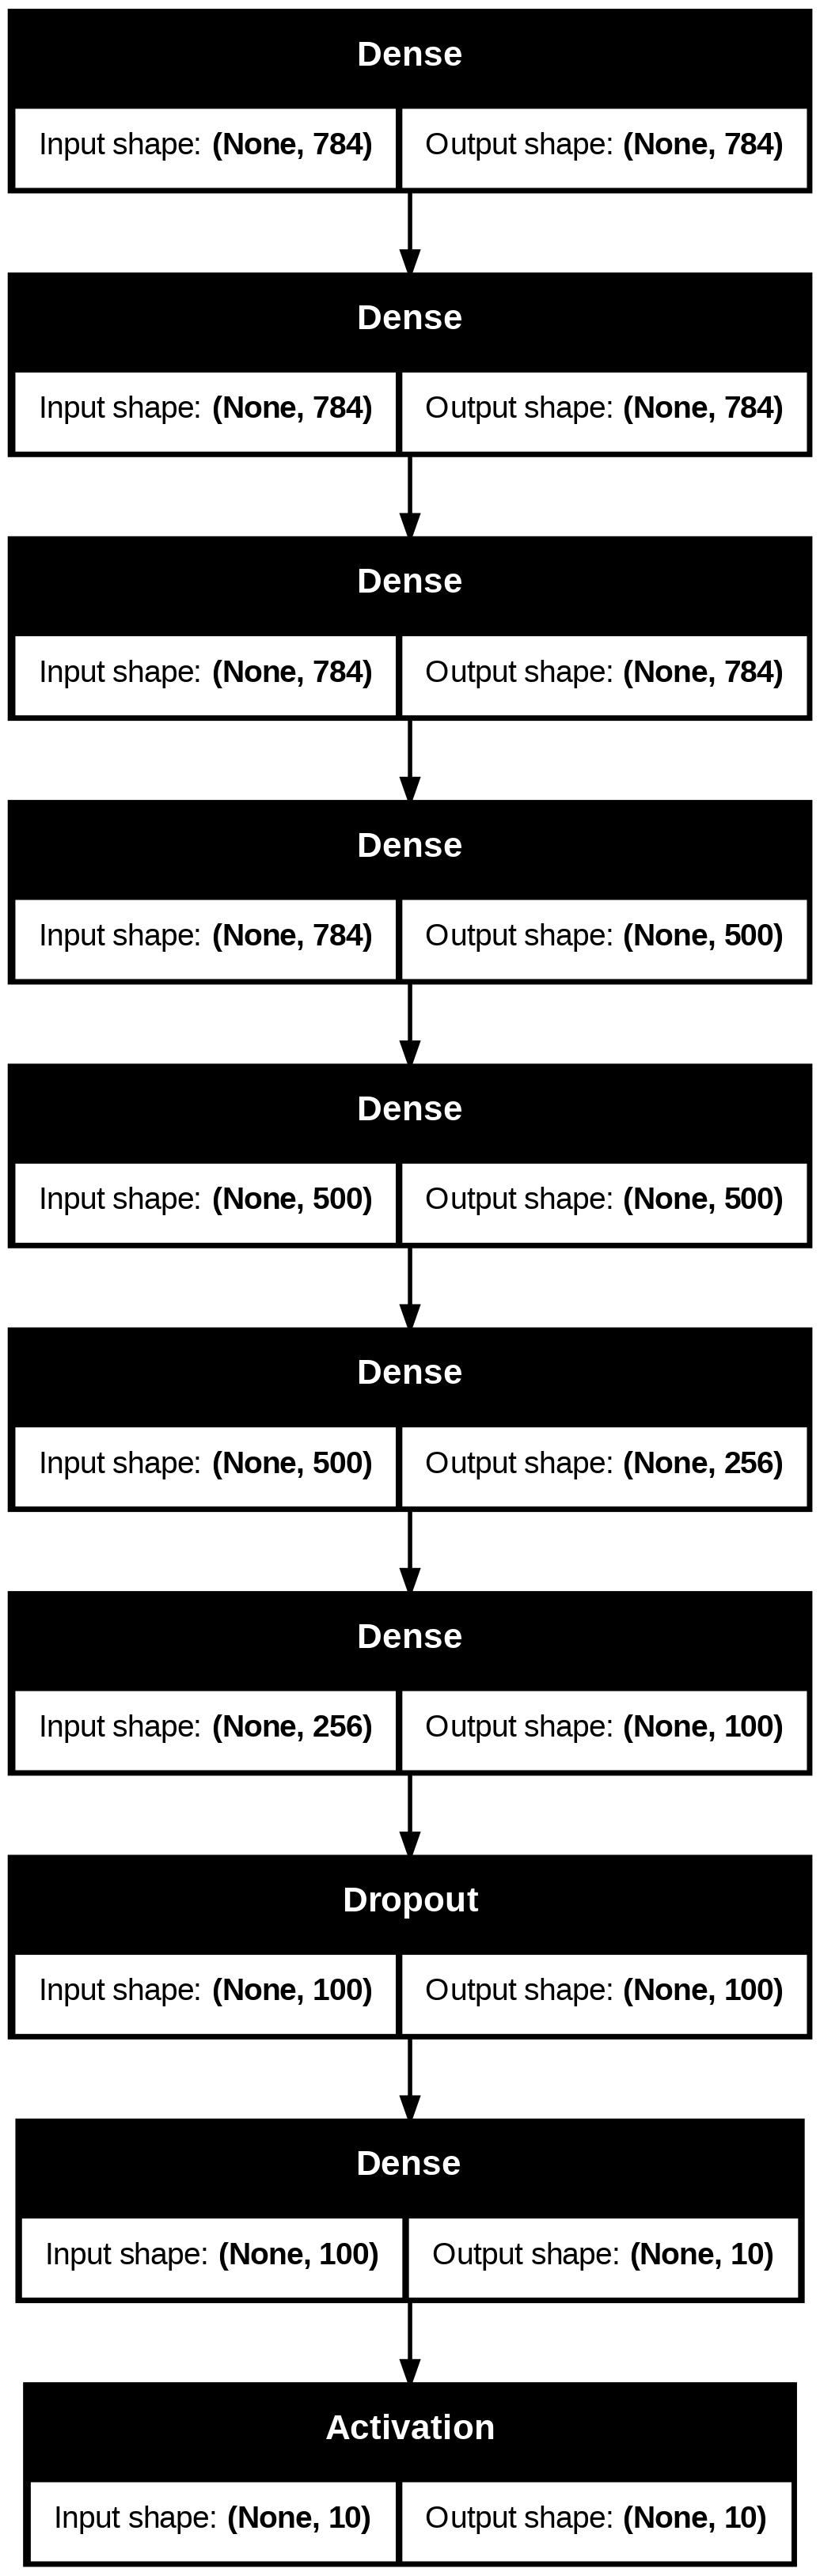

In [ ]:

plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
from keras.callbacks import EarlyStopping
import  keras.metrics as mt

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_train=np.reshape(y_train,(-1,1))
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = enc.fit_transform(y_train).toarray()

In [ ]:
y_train[2]

array([4], dtype=uint8)

In [ ]:
print (enc_df[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


les callbacks sont très semblable aux triggers, ils permetent de controler l'arret de l'apprentissage dans cet exemple.

Une fois que vous appelez fit (... callbacks = [es]) sur votre modèle, Keras appelle des fonctions prédéterminées. Ces fonctions peuvent être appelées en_début_train, en_fin_train, en_début_epoch, en_fin_epoch et en_début_batch, en_fin_batch.

Il est préférable d'utiliser un grand nombre au niveau de patience.

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model.fit(
    x_train,
    enc_df,
    epochs=30,
    batch_size=batch_size,
    callbacks=[
        EarlyStopping(monitor='loss', patience=int(4)),
        ModelCheckpoint(filepath='./best_model/weights.{epoch:02d}.weights.h5', monitor='val_loss', save_weights_only=True)
    ]
)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.9886 - loss: 0.0930
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9898 - loss: 0.0886
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.9883 - loss: 0.0924
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9884 - loss: 0.0967
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9885 - loss: 0.0931
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9893 - loss: 0.0906
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9911 - loss: 0.0831
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9899 - loss: 0.0872
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9895 - loss: 0.0894
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9908 - loss: 0.0848
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9908 - loss: 0.0821


In [ ]:
enc_df2 = enc.fit_transform(y_test).toarray()

In [ ]:
loss, acc = model.evaluate(x_test, enc_df2)
print(loss, acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9745 - loss: 0.1769
0.15603718161582947 0.9783999919891357


In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_test=np.reshape(y_test,(-1,1))
# creating instance of one-hot-encoder
enc1 = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df2 = enc1.fit_transform(y_test).toarray()